# Lead Scoring Case Study

### Steps:-
1. Read, understand and prepare the data
2. Exploratory Data Analysis
3. Outlier Analysis / Transformation / Treatment
4. Modelling
5. Model accurance & Metrics
5. Final analysis and conclusions

In [200]:
#Loading Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
from matplotlib.pyplot import xticks
%matplotlib inline
import matplotlib.ticker as mtick
import os

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#ML Libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

os.chdir("C:/Users/aliborious/Desktop/Py/Python Assignment")

In [201]:
#reading Dataset
leads = pd.read_csv("Leads.csv")
data = leads.copy()
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [202]:
# Missing data check
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False).round(2)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print("Missing Data" '\n', missing_data(data),'\n')
print("Shape" '\n', data.shape,'\n')
print("Data Type" '\n', data.dtypes)

Missing Data
                                                Total  Percent
Lead Quality                                    4767    51.59
Asymmetrique Profile Score                      4218    45.65
Asymmetrique Activity Score                     4218    45.65
Asymmetrique Profile Index                      4218    45.65
Asymmetrique Activity Index                     4218    45.65
Tags                                            3353    36.29
What matters most to you in choosing a course   2709    29.32
Lead Profile                                    2709    29.32
What is your current occupation                 2690    29.11
Country                                         2461    26.63
How did you hear about X Education              2207    23.89
Specialization                                  1438    15.56
City                                            1420    15.37
TotalVisits                                      137     1.48
Page Views Per Visit                             137    

## Insights:

1. Data set has 9240 rows and 37 columns
2. The data set has 17 (out of 37) columns with missing values.
3. There are 7 numerical columns while rest are categorical

In [203]:
data.describe(percentiles=[.25,.5,.75,.90]).round(2)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
90%,650506.10,1.00,7.00,1380.00,5.00,16.00,19.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [204]:
# Random check on question type categorical columns
# Since data set is small, scanned the excel manually as well to check for any ambiguity in data

In [205]:
data['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [206]:
data['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [207]:
data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

# Insights:

1. In some columns the value "Select" contributes to most of the entries which can due to missing values or information is not filled
2. All select value from entire data set can be considered to Null or blank

In [208]:
data = data.replace('Select', np.nan)
data.isnull().sum().sort_values(ascending = False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Lead Number                 

In [209]:
missing_data(data)

,Total,Percent
How did you hear about X Education,7250,78.46
Lead Profile,6855,74.19
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
City,3669,39.71
Specialization,3380,36.58
Tags,3353,36.29


In [210]:
#Check if any column/row has only values as zero
print(len(data.loc[:, (data != 0).any(axis=0)]))

#Check if any column/row has only negative values
print(len(data.loc[:, (data < 0).any(axis=0)]))

# Check if all prospects and leads are unique or have duplicate entries
# Check number of unique values in each column
print("Number of Unique values in each column:",'\n\n', data.nunique(dropna = True).sort_values(ascending = True))

9240
9240
Number of Unique values in each column: 

 Get updates on DM Content                           1
I agree to pay the amount through cheque            1
Receive More Updates About Our Courses              1
Magazine                                            1
Update me on Supply Chain Content                   1
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
A free copy of Mastering The Interview              2
Search                                              2
Newspaper Article                                   2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
What matters most to you in choosing a course       3
Asymmetrique Activity Index                         3
Asymmetrique Profile Index   

## Insights:

1. There are three columns with more than 50% missing values.
2. However these columns seem to have business relevance as it tells about the quality of the leads except "How did you hear about X Education" (78.5% missing vallues)
3. So all categorical columns has to be individually analyzed and imputed or deleted after careful observation
4. There are no duplicate entries for lead number and prospect ID. i.e. all are unique
5. There are five categorical column (mentioned below) with only one unique value. During dummy variable creation step these column will not be much significant as all encoded numberical value will be same and will be of no use to the model
  - Get updates on DM Content
  - I agree to pay the amount through cheque
  - Receive More Updates About Our Courses
  - Magazine
  - Update me on Supply Chain Content
6. The source of the leads has 36 missing values which is 0.4% of total values. Hence these rows can be ignored

In [211]:
#Remove columns with one unique value
data = data.loc[:,leads.nunique()!=1]
data = data[~pd.isnull(leads['Lead Source'])]
data.shape

(9204, 32)

## Insights:

1. Per data dictionary for below mentioned columns the description says it represents "An index and score assigned to each customer based on their activity and their profile"
 - Asymmetrique Activity Index
 - Asymmetrique Profile Index
 - Asymmetrique Activity Score
 - Asymmetrique Profile Score
2. As it is redundant either index or score can be used for further analysis

In [212]:
# Removing score and keeping index as it defines a category/bucket
data = data.drop('Asymmetrique Activity Score', axis=1)
data = data.drop('Asymmetrique Profile Score', axis=1)

# Deleting 'Prospect ID' as it is just a unqiue ID redundant with Lead number
data = data.drop('Prospect ID', axis=1)
data = data.drop('How did you hear about X Education', axis=1)
data.shape

(9204, 28)

In [213]:
# Treating missing values in numeric columns as it can be imputed with some values based on missing value percentage
# Here among the numeric columns TotalVisits & Page Views Per Visit have 1.5% missing values
#Imputing with Median values
data['TotalVisits'].replace(np.NaN, data['TotalVisits'].median(), inplace =True)
data['Page Views Per Visit'].replace(np.NaN, leads['Page Views Per Visit'].median(), inplace =True)
data.shape

(9204, 28)

# EDA

## Analyze each column and clean/prepare data for modelling

count      6778
unique       38
top       India
freq       6491
Name: Country, dtype: object


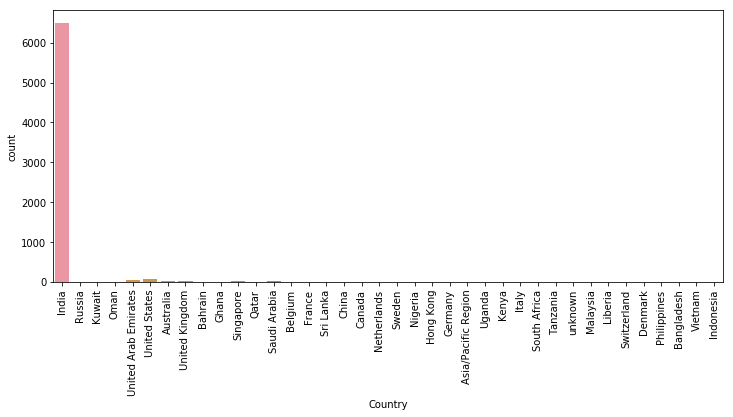

In [214]:
#Demographic analysis - Country & City
plt.figure(figsize = (12,5))
sns.countplot(data.Country)
xticks(rotation = 90)
print(data.Country.describe())

## Insights:
1. Most of the entries belong to India and very few other countries
2. Hence we can categorize it as India and Other
3. We can impute the missing values in country column with "India" as it is the most commonly occuring country

In [215]:
# Country is India for most values so let's impute the same in missing values.
data['Country'] = data['Country'].replace(np.nan, 'India')

In [216]:
data['Country'] = data['Country'].apply(lambda x: 'India' if x=='India' else 'Other Countries')
data['Country'].value_counts()

India              8917
Other Countries     287
Name: Country, dtype: int64

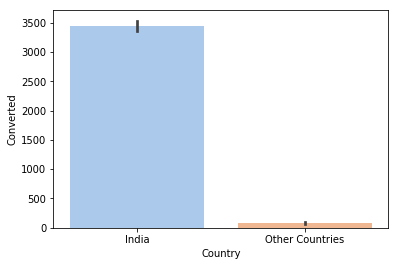

In [217]:
#conversion in India and Other Countries
sns.barplot(x='Country', y='Converted', palette='pastel', data=data, estimator=np.sum)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

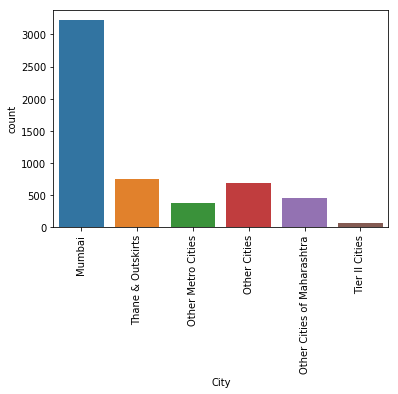

In [218]:
sns.countplot(data.City)
xticks(rotation = 90)

In [219]:
# Cleaning up City details
data['City'].isnull().sum()
data['City'].fillna("Unknown", inplace = True)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

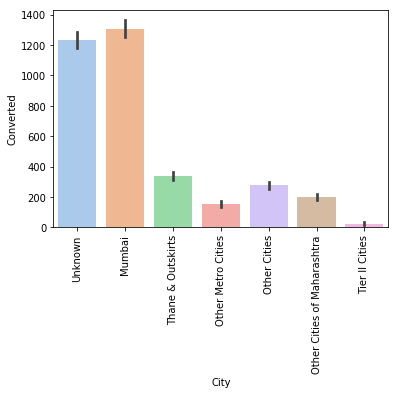

In [220]:
#conversion across cities
sns.barplot(x='City', y='Converted', palette='pastel', data=data, estimator=np.sum)
xticks(rotation = 90)

In [221]:
print("Last Activity categories:\n",data['Last Activity'].value_counts())
print('\n',"Total missing values:",'\n',data['Last Activity'].isnull().sum())

Last Activity categories:
 Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

 Total missing values: 
 101


In [222]:
# Filling NA values
data['Last Activity'].fillna("Not Sure", inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

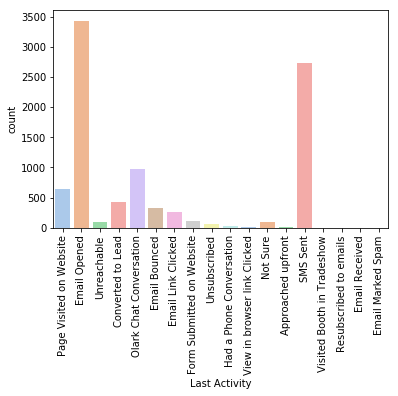

In [223]:
sns.countplot(data['Last Activity'],palette='pastel')
xticks(rotation = 90)

In [224]:
# Clubbing "Last Activity" category with less counts as other_activity
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

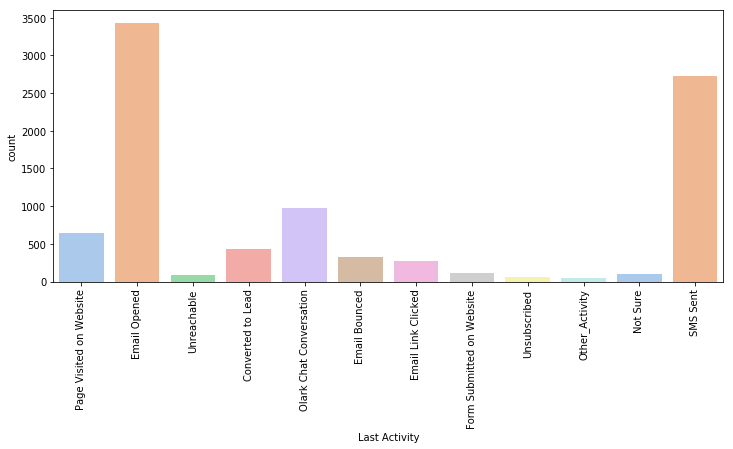

In [225]:
plt.figure(figsize = (12,5))
sns.countplot(data['Last Activity'],palette='pastel')
xticks(rotation = 90)

In [226]:
# Analyze Lead profile & Lead quality as it has high missing values > 50%
print("Lead Quality categories:\n",data['Lead Quality'].value_counts())
print('\n',"Total missing values:",'\n',data['Lead Quality'].isnull().sum())

Lead Quality categories:
 Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

 Total missing values: 
 4753


In [227]:
print("Lead Profile categories:\n",data['Lead Profile'].value_counts())
print('\n',"Total missing values:",'\n',data['Lead Profile'].isnull().sum())

Lead Profile categories:
 Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

 Total missing values: 
 6824


In [228]:
# Filling NA values
data['Lead Profile'].fillna("Not Sure", inplace = True)
data['Lead Quality'].fillna("Not Sure", inplace = True)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

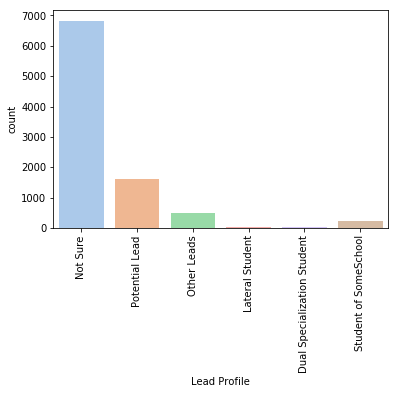

In [229]:
# Lead Profile
sns.countplot(data['Lead Profile'],palette='pastel')
xticks(rotation = 90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

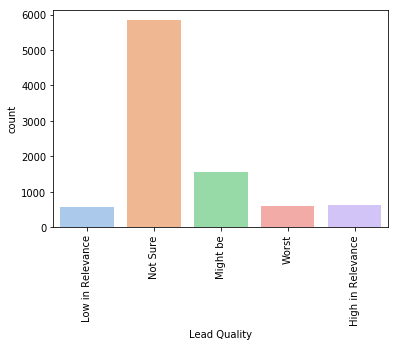

In [230]:
# Lead Quality
sns.countplot(data['Lead Quality'],palette='pastel')
xticks(rotation = 90)

In [231]:
# Analyze rest of categorical columns with high missing value

print("Asymmetrique Profile Index:\n",data['Asymmetrique Profile Index'].value_counts())
print('\n'"Asymmetrique Activity Index:\n",data['Asymmetrique Activity Index'].value_counts())

Asymmetrique Profile Index:
 02.Medium    2771
01.High      2201
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

Asymmetrique Activity Index:
 02.Medium    3820
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64


In [232]:
# Renaming the categories

data["Asymmetrique Profile Index"]= data["Asymmetrique Profile Index"].replace("01.High", "High")
data["Asymmetrique Profile Index"]= data["Asymmetrique Profile Index"].replace("02.Medium", "Medium")
data["Asymmetrique Profile Index"]= data["Asymmetrique Profile Index"].replace("03.Low", "Low")

data["Asymmetrique Activity Index"]= data["Asymmetrique Activity Index"].replace("01.High", "High")
data["Asymmetrique Activity Index"]= data["Asymmetrique Activity Index"].replace("02.Medium", "Medium")
data["Asymmetrique Activity Index"]= data["Asymmetrique Activity Index"].replace("03.Low", "Low")

# Filling NA values
data['Asymmetrique Profile Index'].fillna("Not Sure", inplace = True)
data['Asymmetrique Activity Index'].fillna("Not Sure", inplace = True)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

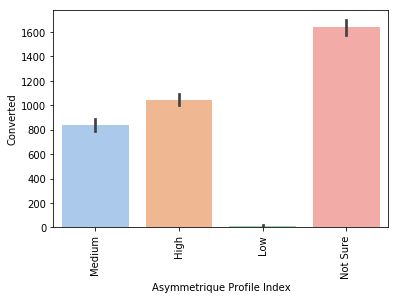

In [233]:
sns.barplot(x='Asymmetrique Profile Index', y='Converted', palette='pastel', data=data, estimator=np.sum)
xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

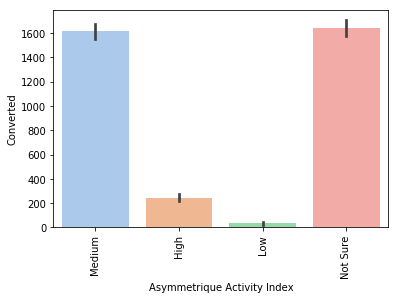

In [234]:
sns.barplot(x='Asymmetrique Activity Index', y='Converted', palette='pastel', data=data, estimator=np.sum)
xticks(rotation = 90)

In [235]:
print("What is your current occupation:\n",data['What is your current occupation'].value_counts())
print('\n',"Total missing values:",'\n',data['What is your current occupation'].isnull().sum())

What is your current occupation:
 Unemployed              5567
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

 Total missing values: 
 2690


In [236]:
# Filling NA values
data['What is your current occupation'].fillna("Not Sure", inplace = True)
data['What is your current occupation'] = data['What is your current occupation'].replace(['Other'], 'Other_Occupation')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

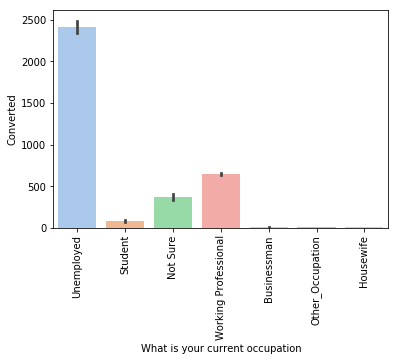

In [237]:
sns.barplot(x='What is your current occupation', y='Converted', palette='pastel', data=data, estimator=np.sum)
xticks(rotation = 90)

In [238]:
print("Specialization:\n",data['Specialization'].value_counts())
print('\n',"Total missing values:",'\n',data['Specialization'].isnull().sum())

Specialization:
 Finance Management                   973
Human Resource Management            847
Marketing Management                 837
Operations Management                502
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                158
Hospitality Management               114
E-COMMERCE                           111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

 Total missing values: 
 3352


In [239]:
# Filling NA values
data['Specialization'].fillna("Not Sure", inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

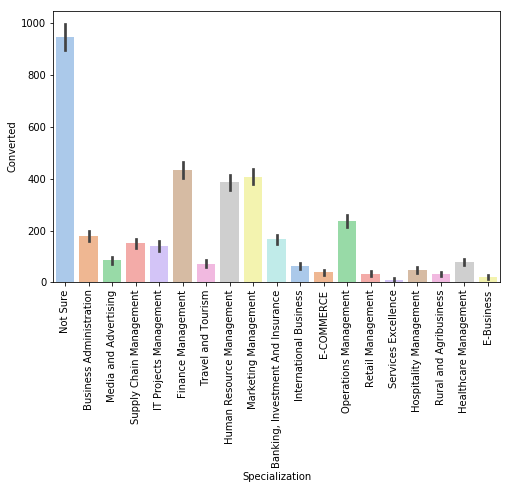

In [240]:
plt.figure(figsize = (8,5))
sns.barplot(x='Specialization', y='Converted', palette='pastel', data=data, estimator=np.sum)
xticks(rotation = 90)

In [241]:
print("Tags:\n",data['Tags'].value_counts())
print('\n',"Total missing values:",'\n',data['Tags'].isnull().sum())

Tags:
 Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to

In [242]:
# Filling NA values
data['Tags'].fillna("Not Sure", inplace = True)

In [243]:
# Clubbing tag counts with less value as  "Other_Tags"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

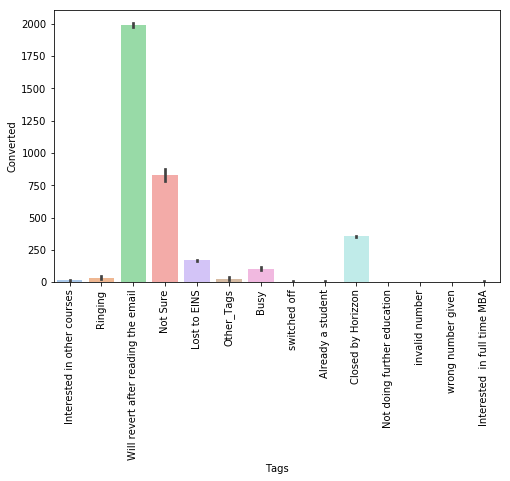

In [244]:
plt.figure(figsize = (8,5))
sns.barplot(x='Tags', y='Converted', palette='pastel', data=data, estimator=np.sum)
xticks(rotation = 90)

In [245]:
print("What matters most to you in choosing a course:\n",data['What matters most to you in choosing a course'].value_counts())
print('\n',"Total missing values:",'\n',data['What matters most to you in choosing a course'].isnull().sum())

What matters most to you in choosing a course:
 Better Career Prospects      6492
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

 Total missing values: 
 2709


## Insights:
1. What matters most to you in choosing a course column analysis
2. There is high imbalance of categories in this column. Most of the category is Better Career Prospects and rest null
3. So this column can be ignored as it has mostly unique values and will not have much significance in modeling

In [246]:
data = data.drop('What matters most to you in choosing a course', axis=1)
data.shape

(9204, 27)

In [247]:
# All null values has been handled. Quick check on null values
missing_data(data)

,Total,Percent
Last Notable Activity,0,0.0
What is your current occupation,0,0.0
Lead Origin,0,0.0
Lead Source,0,0.0
Do Not Email,0,0.0
Do Not Call,0,0.0
Converted,0,0.0
TotalVisits,0,0.0
Total Time Spent on Website,0,0.0
Page Views Per Visit,0,0.0


In [248]:
# Finding the conversion rate
Conversion_rate = (sum(data['Converted'])/len(data['Converted'].index))*100
Conversion_rate

38.374619730551935

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

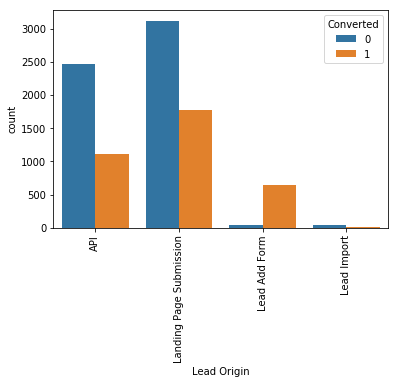

In [249]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = data)
xticks(rotation = 90)

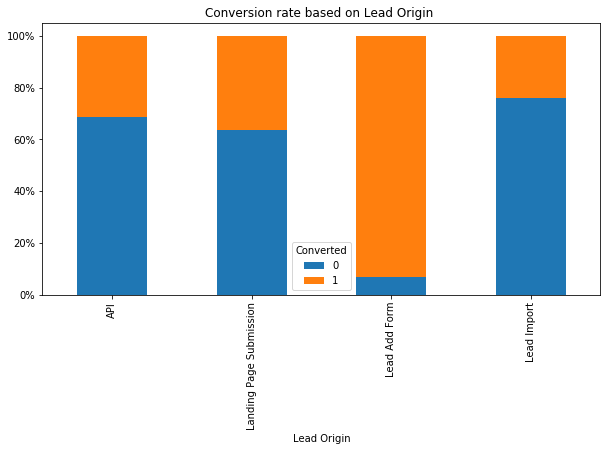

In [250]:
df = data[["Lead Origin", "Converted"]]
df.groupby(['Lead Origin', 'Converted']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True,figsize = (10,5))


plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Conversion rate based on Lead Origin ')
plt.show()

## Insights:
1. Lead orgin from API and Landing Page Submission are significant.
2. However the conversion rate % is low (<40% each)
3. Highest conversion rate is from Lead Add Form (>90%)
3. Lead Import count is very low
4. To increase the overall conversion rate
  - Lead Add Form counts has to be improved
  - Lead conversion rate of API and Landing Page Submission has to be improved

In [251]:
data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
WeLearn                 1
testone                 1
blog                    1
Pay per Click Ads       1
NC_EDM                  1
youtubechannel          1
welearnblog_Home        1
Name: Lead Source, dtype: int64

## Insights:

1. Google has typo need to be corrected (google and Google are same)
2. There are 12 categories with counts < 10
3. All these with low counts can be clubbed as other

In [252]:
# Correcting typo for google and Google
# Clubbing categories with less counts as other
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

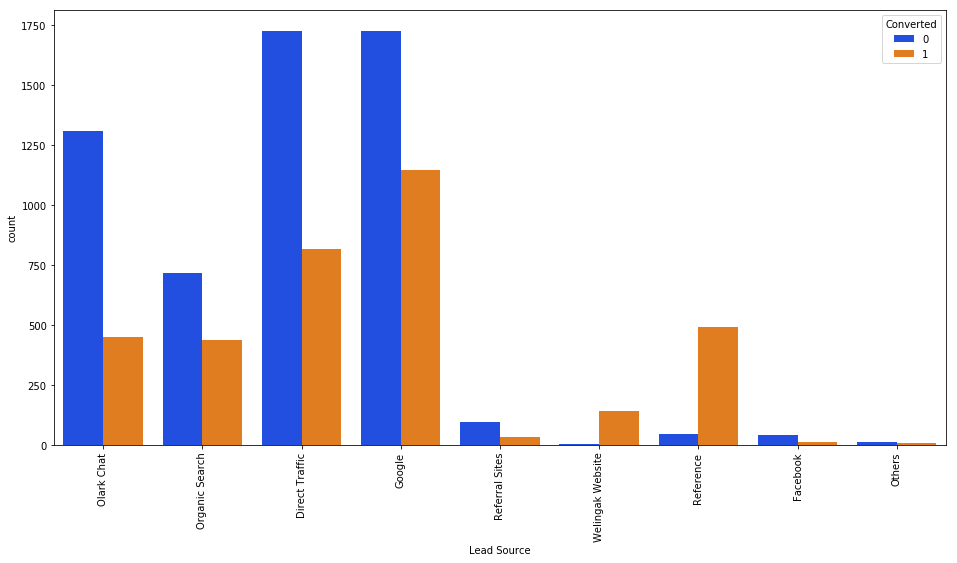

In [253]:
fig, axs = plt.subplots(figsize = (16,8))
sns.countplot(x = "Lead Source", hue = "Converted", data = data, palette='bright')
xticks(rotation = 90)

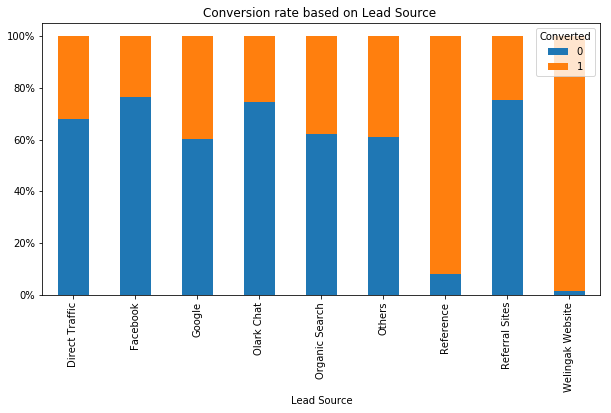

In [254]:
df1 = data[["Lead Source", "Converted"]]
df1.groupby(['Lead Source', 'Converted']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True,figsize = (10,5))


plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Conversion rate based on Lead Source ')
plt.show()

## Insights:

1. Highest number of leads are generated from Google and Direct traffic
2. Conversion Rate of reference leads and leads through welingak website are high
3. To increase the overall conversion rate
  - Lead count through reference and welingak website has to be improved
  - Conversion rate of olark chat, organic search, direct traffic, and google leads has to be improved

(array([0, 1]), <a list of 2 Text xticklabel objects>)

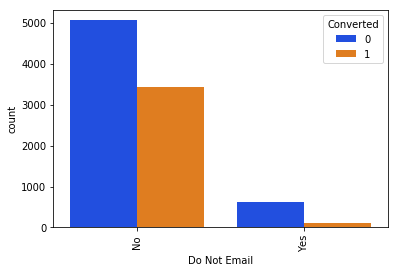

In [255]:
#Do Not Email
sns.countplot(x = "Do Not Email", hue = "Converted", data = data, palette='bright')
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

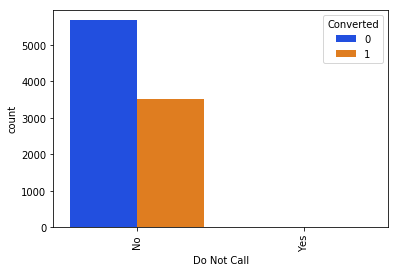

In [256]:
# Do Not Call
sns.countplot(x = "Do Not Call", hue = "Converted", data = data, palette='bright')
xticks(rotation = 90)

In [257]:
# Numeric variable analysis
data.describe(percentiles=[0.05,.25, .5, .75, .90, .95,.99]).round(2)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9204.00,9204.00,9204.00,9204.00,9204.00
mean,617194.61,0.38,3.45,489.01,2.36
std,23418.83,0.49,4.82,547.98,2.15
min,579533.00,0.00,0.00,0.00,0.00
5%,582868.30,0.00,0.00,0.00,0.00
25%,596484.50,0.00,1.00,14.00,1.00
50%,615479.00,0.00,3.00,250.00,2.00
75%,637409.25,1.00,5.00,938.00,3.00
90%,650513.10,1.00,7.00,1380.00,5.00
95%,655405.85,1.00,10.00,1562.00,6.00


## Insights:
1. The outlier for total visits and page views per visit is high
2. Hence ouliers can be treated using IQR method

In [258]:
#Removing outlier values based on the Interquartile distance for numerical variables
Q1 = data['TotalVisits'].quantile(0.25)
Q3 = data['TotalVisits'].quantile(0.75)
IQR = Q3-Q1
data=data.loc[(data['TotalVisits'] >= Q1 - 1.5*IQR) & (data['TotalVisits'] <= Q3 + 1.5*IQR)]
data.shape

(8937, 27)

In [259]:
Q1 = data['Page Views Per Visit'].quantile(0.25)
Q3 = data['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
data=data.loc[(data['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (data['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

data.shape

(8643, 27)

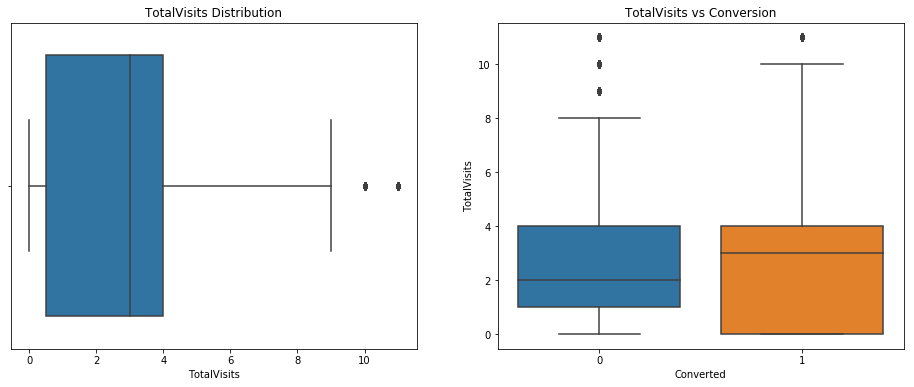

In [260]:
# Numerical data visualization

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('TotalVisits Distribution')
sns.boxplot(data['TotalVisits'])
plt.subplot(1,2,2)
plt.title('TotalVisits vs Conversion')
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)
plt.show()

## Insights:
1. The 50% median value seem to be almost close for converted and not converted (Total Visits)

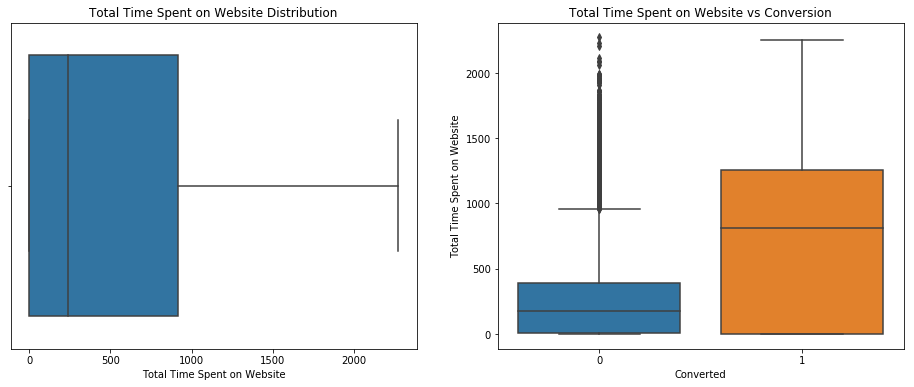

In [261]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Total Time Spent on Website Distribution')
sns.boxplot(data['Total Time Spent on Website'])
plt.subplot(1,2,2)
plt.title('Total Time Spent on Website vs Conversion')
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)
plt.show()

## Insights:

1. Median value between converted and not converted significantly different
2. Leads spending more time on the weblise are more likely to be converted

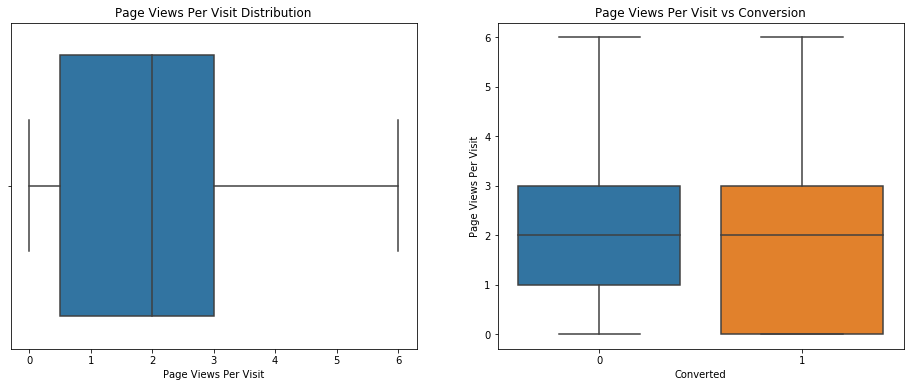

In [262]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Page Views Per Visit Distribution')
sns.boxplot(data['Page Views Per Visit'])
plt.subplot(1,2,2)
plt.title('Page Views Per Visit vs Conversion')
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)
plt.show()

## Insights:

1. The 50% median value seem to be almost same for both converted and not converted. i.e. no much difference

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

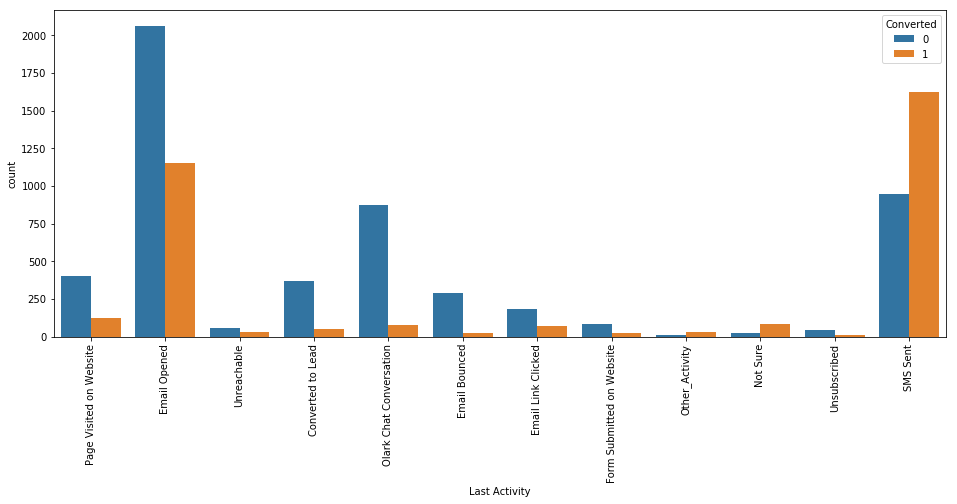

In [263]:
plt.figure(figsize=(16,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

## Insights:
1. Email opened (first) and SMS sent (second) categories have the highest count
2. Conversion rate is high for SMS sent category

In [264]:
#Specialization
data.Specialization.describe()
data['Specialization'] = data['Specialization'].replace(['Others'], 'Other_Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

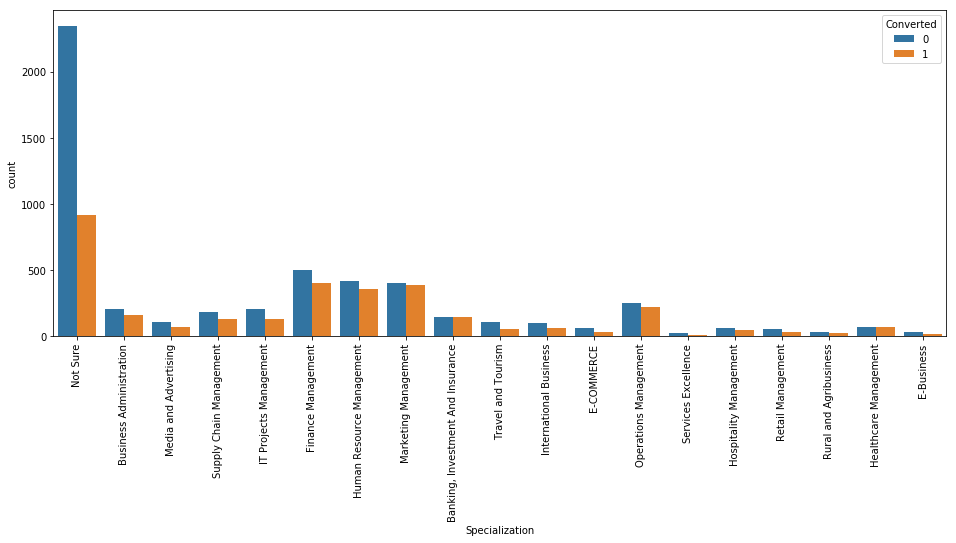

In [265]:
plt.figure(figsize=(16,6))
sns.countplot(x = "Specialization", hue = "Converted", data = data)
xticks(rotation = 90)

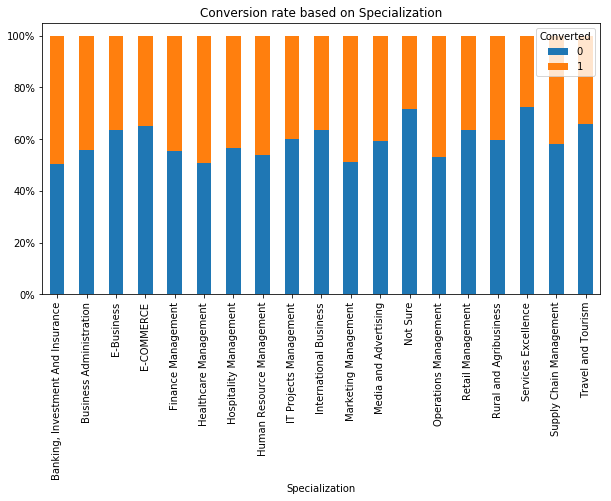

In [266]:
df2 = data[["Specialization", "Converted"]]
df2.groupby(['Specialization', 'Converted']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True,figsize = (10,5))


plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Conversion rate based on Specialization')
plt.show()

## Insights:

1. Focus should be more on the Specialization with high conversion rate like Finance management, HR management, Marketing management and Operations management

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

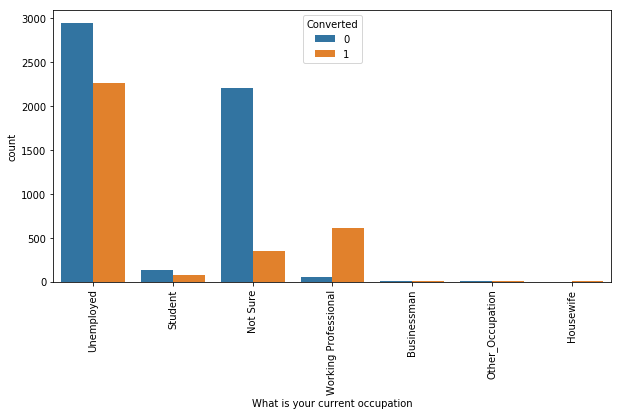

In [267]:
# Occupation
plt.figure(figsize=(10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = data)
xticks(rotation = 90)

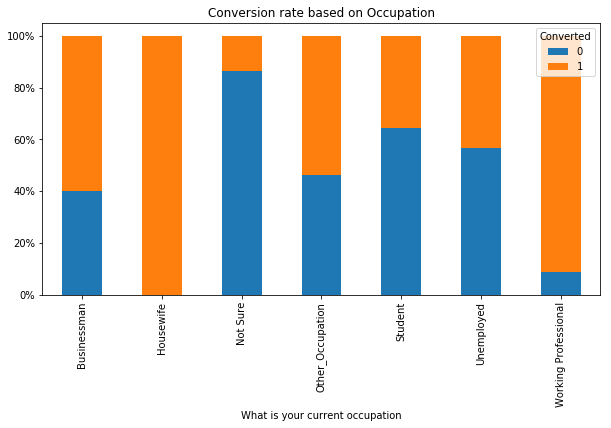

In [268]:
df3 = data[["What is your current occupation", "Converted"]]
df3.groupby(['What is your current occupation', 'Converted']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True,figsize = (10,5))


plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Conversion rate based on Occupation')
plt.show()

## Insights:

1. Unemployed leads are the most in numbers but has conversion rate < 45%
2. Working Professional and Housewife have highest conversion rate but Housewife numbers are too less

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

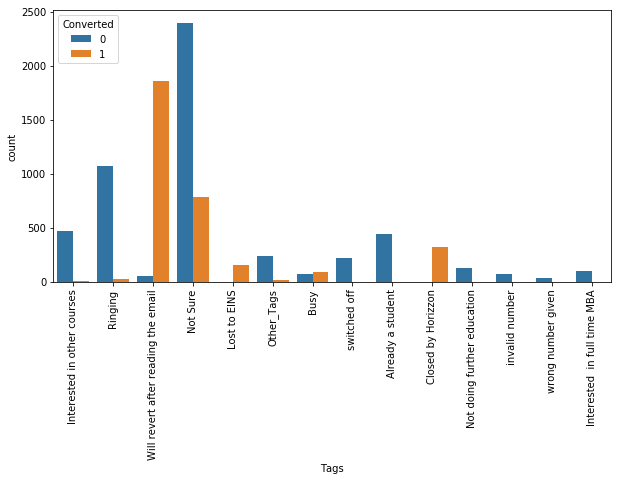

In [269]:
# Tags
plt.figure(figsize=(10,5))
sns.countplot(x = "Tags", hue = "Converted", data = data)
xticks(rotation = 90)

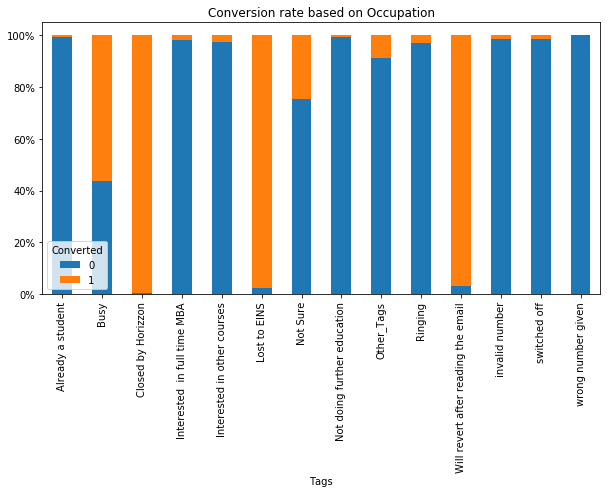

In [270]:
df4 = data[["Tags", "Converted"]]
df4.groupby(['Tags', 'Converted']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True,figsize = (10,5))


plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Conversion rate based on Occupation')
plt.show()

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

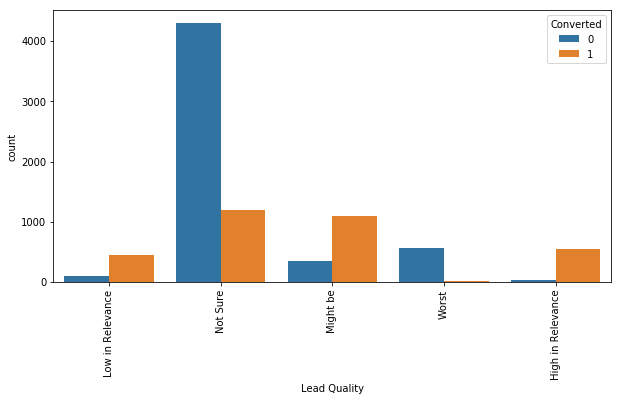

In [271]:
# Lead Quality
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = data)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

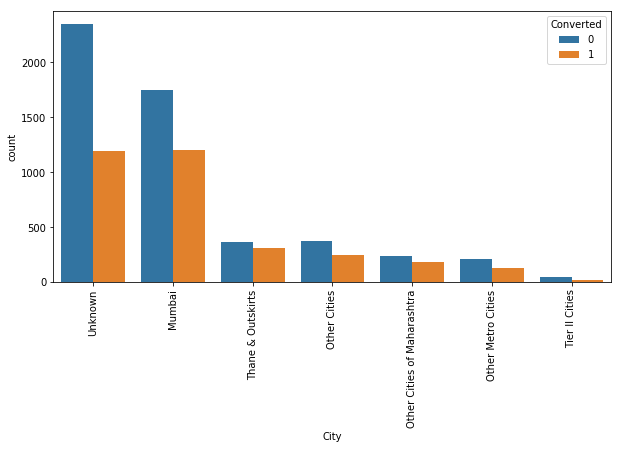

In [272]:
# City
plt.figure(figsize=(10,5))
sns.countplot(x = "City", hue = "Converted", data = data)
xticks(rotation = 90)

## Insights:

1. Most of the leads are from Mumbai city

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

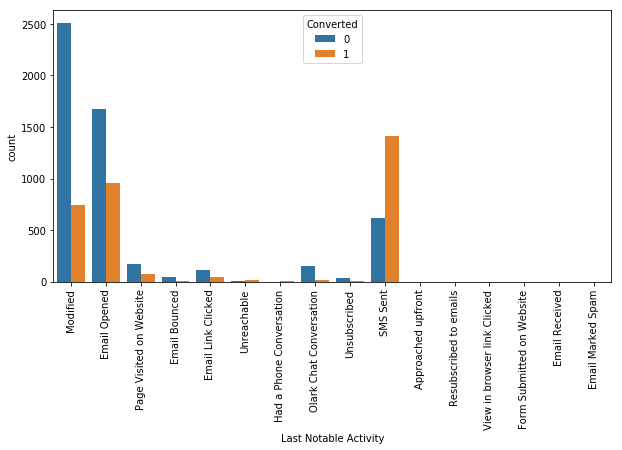

In [273]:
#Last Notable Activity

plt.figure(figsize=(10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data)
xticks(rotation = 90)

In [274]:
print("Search Counts",'\n',data['Search'].value_counts())
print('\n',"Newspaper Article Counts",'\n',data['Newspaper Article'].value_counts())
print('\n',"Digital Advertisement Counts",'\n',data['Digital Advertisement'].value_counts())
print('\n',"X Education Forums Counts ",'\n',data['X Education Forums'].value_counts())
print('\n',"Newspaper Counts",'\n',data['Digital Advertisement'].value_counts())
print('\n',"Recommendations Counts",'\n',data['Through Recommendations'].value_counts())
print('\n',"A free copy of Mastering The Interview Counts",'\n',data['A free copy of Mastering The Interview'].value_counts())

Search Counts 
 No     8635
Yes       8
Name: Search, dtype: int64

 Newspaper Article Counts 
 No    8643
Name: Newspaper Article, dtype: int64

 Digital Advertisement Counts 
 No     8641
Yes       2
Name: Digital Advertisement, dtype: int64

 X Education Forums Counts  
 No    8643
Name: X Education Forums, dtype: int64

 Newspaper Counts 
 No     8641
Yes       2
Name: Digital Advertisement, dtype: int64

 Recommendations Counts 
 No     8639
Yes       4
Name: Through Recommendations, dtype: int64

 A free copy of Mastering The Interview Counts 
 No     6073
Yes    2570
Name: A free copy of Mastering The Interview, dtype: int64


In [275]:
data.shape

(8643, 27)

In [276]:
data.to_csv("Leadsdf.csv")

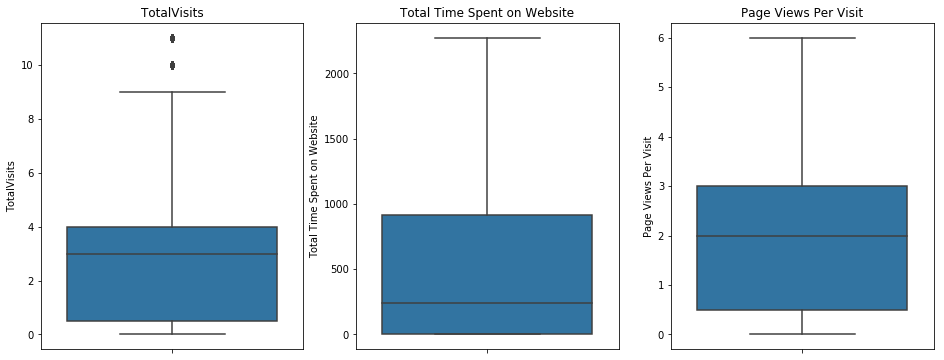

In [277]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.title('TotalVisits')
sns.boxplot(data['TotalVisits'],orient = "v")
plt.subplot(1,3,2)
plt.title('Total Time Spent on Website'),
sns.boxplot(data['Total Time Spent on Website'],orient = "v")
plt.subplot(1,3,3)
plt.title('Page Views Per Visit')
sns.boxplot(data['Page Views Per Visit'],orient = "v")
plt.show()

In [278]:
#Converting binary variables (Yes/No) to 0/1
# List of variables to map

varlist =  ['Search','Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list
data[varlist] =  data[varlist].apply(binary_map)
data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,Interested in other courses,Low in Relevance,Not Sure,Unknown,Medium,Medium,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,Ringing,Not Sure,Not Sure,Unknown,Medium,Medium,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,Will revert after reading the email,Might be,Potential Lead,Mumbai,Medium,High,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,Ringing,Not Sure,Not Sure,Mumbai,Medium,High,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,Will revert after reading the email,Might be,Not Sure,Mumbai,Medium,High,0,Modified


In [279]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['Country', 'Lead Source','Lead Origin','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)
data.shape

(8643, 54)

In [280]:
# Creating dummy variables for the remaining categorical variables
# Dropping Not sure - NA/select values

# Last Activity
d1 = pd.get_dummies(data['Last Activity'], prefix='Last Activity')
# Dropping Level Not Sure
dl1 = d1.drop(['Last Activity_Not Sure'], 1)
#Adding the results to the master dataframe
data = pd.concat([data,dl1], axis=1)

# Specialization
d1 = pd.get_dummies(data['Specialization'], prefix='Specialization')
dl1 = d1.drop(['Specialization_Not Sure'], 1)
data = pd.concat([data,dl1], axis=1)

# What is your current occupation
d1 = pd.get_dummies(data['What is your current occupation'], prefix='What is your current occupation')
dl1 = d1.drop(['What is your current occupation_Not Sure'], 1)
data = pd.concat([data,dl1], axis=1)

# Tags
d1 = pd.get_dummies(data['Tags'], prefix='Tags')
dl1 = d1.drop(['Tags_Not Sure'], 1)
data = pd.concat([data,dl1], axis=1)

# Lead Quality
d1 = pd.get_dummies(data['Lead Quality'], prefix='Lead Quality')
dl1 = d1.drop(['Lead Quality_Not Sure'], 1)
data = pd.concat([data,dl1], axis=1)

# Lead Profile
d1 = pd.get_dummies(data['Lead Profile'], prefix='Lead Profile')
dl1 = d1.drop(['Lead Profile_Not Sure'], 1)
data = pd.concat([data,dl1], axis=1)

# City
d1 = pd.get_dummies(data['City'], prefix='City')
dl1 = d1.drop(['City_Unknown'], 1)
data = pd.concat([data,dl1], axis=1)

# Asymmetrique Activity Index
d1 = pd.get_dummies(data['Asymmetrique Activity Index'], prefix='Asymmetrique Activity Index')
dl1 = d1.drop(['Asymmetrique Activity Index_Not Sure'], 1)
data = pd.concat([data,dl1], axis=1)

# Asymmetrique Profile Index
d1 = pd.get_dummies(data['Asymmetrique Profile Index'], prefix='Asymmetrique Profile Index')
dl1 = d1.drop(['Asymmetrique Profile Index_Not Sure'], 1)
data = pd.concat([data,dl1], axis=1)

In [281]:
data.shape

(8643, 123)

In [282]:
#Dropping the repeated variables
# Since dummies have been created for below variables it can dropped now
data = data.drop(['Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Tags','Lead Profile',
                    'Lead Origin','What is your current occupation', 'Specialization', 'City','Last Activity', 'Country', 
                    'Lead Source','Last Notable Activity'], 1)
data.shape

(8643, 110)

In [283]:
data.to_csv("Leadsfinal.csv")
data.head(5)

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Low,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Low,Asymmetrique Profile Index_Medium
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [284]:
# Ensuring there are no categorical columns left in the dataframe
cols = data.columns
num_cols = data._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [285]:
# Creating a copy
leads_data = data.copy()
print(leads_data.shape)
print(data.shape)

(8643, 110)
(8643, 110)


# Model Building

In [286]:
# Test-Train Split
# Putting feature variable to X
X = data.drop(['Converted','Lead Number'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Low,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Low,Asymmetrique Profile Index_Medium
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [287]:
# Putting response variable to y
y = data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [288]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [289]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Low,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Low,Asymmetrique Profile Index_Medium
5720,0,0,0.497461,1.974846,1.161899,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7026,0,0,-1.170391,-0.876707,-1.266501,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6968,0,0,1.331387,1.265159,-0.052301,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5016,0,0,-1.170391,-0.876707,-1.266501,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6653,0,0,-0.336465,0.705457,-0.052301,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [290]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Low,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Low,Asymmetrique Profile Index_Medium
count,6050.000000,6050.000000,6.050000e+03,6.050000e+03,6.050000e+03,6050.000000,6050.0,6050.0,6050.0,6050.000000,...,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000,6050.000000
mean,0.076033,0.000331,-4.164942e-17,-5.895193e-17,-2.936127e-18,0.000826,0.0,0.0,0.0,0.000165,...,0.047603,0.039339,0.077521,0.008099,0.083636,0.039835,0.416694,0.229752,0.002479,0.307934
std,0.265073,0.018180,1.000083e+00,1.000083e+00,1.000083e+00,0.028738,0.0,0.0,0.0,0.012856,...,0.212943,0.194416,0.267438,0.089638,0.276865,0.195587,0.493052,0.420708,0.049735,0.461677
min,0.000000,0.000000,-1.170391e+00,-8.767069e-01,-1.266501e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-1.170391e+00,-8.767069e-01,-1.266501e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,8.049795e-02,-4.395541e-01,-5.230092e-02,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,4.974608e-01,7.909668e-01,5.547992e-01,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,3.416201e+00,3.278988e+00,2.376099e+00,1.000000,0.0,0.0,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [291]:
# Lead Conversion Rate
Conversion = (sum(data['Converted'])/len(data['Converted'].index))*100
Conversion

38.215897257896565

In [292]:
# Logistic regression model
#Iteration 1
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     5947
Model Family:                Binomial   Df Model:                          102
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 25 Aug 2019   Deviance:                          nan
Time:                        20:51:27   Pearson chi2:                 2.95e+18
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -3.352e+14   1.38e+07  -2.43e+07      0.000   -3.35e+14   -3.35e+14
Do Not Email                                         -4.549e+14   4.84e+06   -9.4e+07      0.000   -4.55e+14   -4.55e+14
Do Not Call                                           9.997e+15   4.79e+07   2.09e+08      0.000       1e+16       1e+16
TotalVisits                                            1.14e+14   1.46e+06    7.8e+07      0.000    1.14e+14    1.14e+14
Total Time Spent on Website                           4.058e+14   1.06e+06   3.82e+08      0.000    4.06e+14    4.06e+14
Page Views Per Visit                                 -1.682e+14   1.62e+06  -1.04e+08      0.000   -1.68e+14   -1.68e+14
Search                                                1.229e+15   3.21e+07   3.83e+07      0.000    1.23e+15    1.23e+15
Newspaper Article                                      -28.2863   2.22e-07  -1.27e+08      0.000     -28.286     -28.286
X Education Forums                                      -6.5395   2.96e-07  -2.21e+07      0.000      -6.539      -6.539
Newspaper                                               29.6526   5.85e-07   5.07e+07      0.000      29.653      29.653
Digital Advertisement                                 2.235e+14   6.76e+07   3.31e+06      0.000    2.24e+14    2.24e+14
Through Recommendations                               9.218e+14   5.04e+07   1.83e+07      0.000    9.22e+14    9.22e+14
A free copy of Mastering The Interview               -1.607e+14   2.91e+06  -5.52e+07      0.000   -1.61e+14   -1.61e+14
Country_Other Countries                              -1.428e+14   5.31e+06  -2.69e+07      0.000   -1.43e+14   -1.43e+14
Lead Source_Facebook                                 -1.256e+15   6.82e+07  -1.84e+07      0.000   -1.26e+15   -1.26e+15
Lead Source_Google                                   -2.555e+13   3.07e+06  -8.32e+06      0.000   -2.56e+13   -2.56e+13
Lead Source_Olark Chat                                1.773e+14   4.31e+06   4.12e+07      0.000    1.77e+14    1.77e+14
Lead Source_Organic Search                           -8.009e+13   3.59e+06  -2.23e+07      0.000   -8.01e+13   -8.01e+13
Lead Source_Others                                    1.861e+14   1.83e+07   1.01e+07      0.000    1.86e+14    1.86e+14
Lead Source_Reference                                 4.984e+14   3.37e+07   1.48e+07      0.000    4.98e+14    4.98e+14
Lead Source_Referral Sites                           -4.044e+14   8.49e+06  -4.76e+07      0.000   -4.04e+14   -4.04e+14
Lead Source_Welingak Website                          1.789e+15   3.43e+07   5.21e+07      0.000    1.79e+15    1.79e+15
Lead Origin_Landing Page Submission                  -1.156e+14   4.19e+06  -2.76e+07      0.000   -1.16e+14   -1.16e+14
Lead Origin_Lead

# Feature Selection Using RFE

In [293]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [294]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False])

In [295]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 2),
 ('Do Not Call', False, 59),
 ('TotalVisits', False, 47),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 46),
 ('Search', False, 13),
 ('Newspaper Article', False, 88),
 ('X Education Forums', False, 87),
 ('Newspaper', False, 86),
 ('Digital Advertisement', False, 79),
 ('Through Recommendations', False, 82),
 ('A free copy of Mastering The Interview', False, 35),
 ('Country_Other Countries', False, 43),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', False, 71),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 52),
 ('Lead Source_Others', False, 36),
 ('Lead Source_Reference', False, 28),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', False, 4),
 ('Lead Origin_Lead Import', False, 53),
 ('Last Notable Activity_Email Bounced', False, 57),
 ('Last Notable Activit

In [296]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Last Notable Activity_Modified',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_Low'],
      dtype='object')

In [297]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Country_Other Countries',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable 

In [298]:
# Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6029
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1143.5
Date:                Sun, 25 Aug 2019   Deviance:                       2287.0
Time:                        20:51:32   Pearson chi2:                 1.06e+04
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1323      0.102    -20.870      0.000      -2.333      -1.932
Lead Source_Welingak Website                             3.9562      1.028      3.848      0.000       1.941       5.971
Last Notable Activity_Modified                          -1.5170      0.131    -11.560      0.000      -1.774      -1.260
Last Activity_SMS Sent                                   2.1920      0.125     17.583      0.000       1.948       2.436
What is your current occupation_Student                  2.2575      0.521      4.332      0.000       1.236       3.279
What is your current occupation_Unemployed               2.3371      0.135     17.286      0.000       2.072       2.602
What is your current occupation_Working Professional     2.6411      0.390      6.778      0.000       1.877       3.405
Tags_Already a student                                  -3.8041      0.616     -6.172      0.000      -5.012      -2.596
Tags_Closed by Horizzon                                  5.7030      0.732      7.790      0.000       4.268       7.138
Tags_Interested  in full time MBA                       -2.9917      0.738     -4.054      0.000      -4.438      -1.545
Tags_Interested in other courses                        -3.0400      0.371     -8.192      0.000      -3.767      -2.313
Tags_Lost to EINS                                        5.5827      0.576      9.684      0.000       4.453       6.713
Tags_Not doing further education                        -3.9224      1.037     -3.783      0.000      -5.955      -1.890
Tags_Other_Tags                                         -2.1719      0.307     -7.072      0.000      -2.774      -1.570
Tags_Ringing                                            -4.9840      0.266    -18.741      0.000      -5.505      -4.463
Tags_Will revert after reading the email                 3.3114      0.219     15.154      0.000       2.883       3.740
Tags_invalid number                                     -4.8810      1.042     -4.686      0.000      -6.922      -2.840
Tags_switched off                                       -5.7493      0.731     -7.867      0.000      -7.182      -4.317
Tags_wrong number given                                -24.4448   1.46e+04     -0.002      0.999   -2.86e+04    2.86e+04
Lead Quality_Worst                                      -1.4681      0.632     -2.321      0.020      -2.708      -0.229
Asymmetrique Activity Index_Low                         -2.2460      0.421     -5.334      0.000      -3.071      -1.421
========================================================================================================================
"""

In [299]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5720    0.987761
7026    0.105997
6968    0.971145
5016    0.514928
6653    0.916582
7157    0.055449
2521    0.971145
920     0.025351
4731    0.971145
134     0.933641
dtype: float64

In [300]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98776132, 0.10599735, 0.97114539, 0.51492813, 0.91658214,
       0.05544882, 0.97114539, 0.02535081, 0.97114539, 0.93364119])

In [301]:
# Creating a dataframe with the actual conversion flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.987761,5720
1,0,0.105997,7026
2,1,0.971145,6968
3,1,0.514928,5016
4,1,0.916582,6653


In [302]:
# Creating new column 'predicted' with 1 if Conversion_Probability > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.987761,5720,1
1,0,0.105997,7026,0
2,1,0.971145,6968,1
3,1,0.514928,5016,1
4,1,0.916582,6653,1


In [303]:
# Confusion Matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3521  235]
 [ 165 2129]]


In [304]:
# Predicted     not_churn    churn
# Actual
# not_churn        3521      235
# churn            165       2129  

In [305]:
# Checking the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9338842975206612


In [306]:
# Checking VIF values for feature variables
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Closed by Horizzon,1.45
12,Tags_Other_Tags,1.45
3,What is your current occupation_Student,1.32
11,Tags_Not doing further education,1.32
16,Tags_switched off,1.24
8,Tags_Interested in full time MBA,1.18
19,Asymmetrique Activity Index_Low,1.15
10,Tags_Lost to EINS,1.12
15,Tags_invalid number,1.10
0,Lead Source_Welingak Website,1.10


## Insights:
1. The VIF values are for all the features are less than 5 indicating there is no much multicollinearity

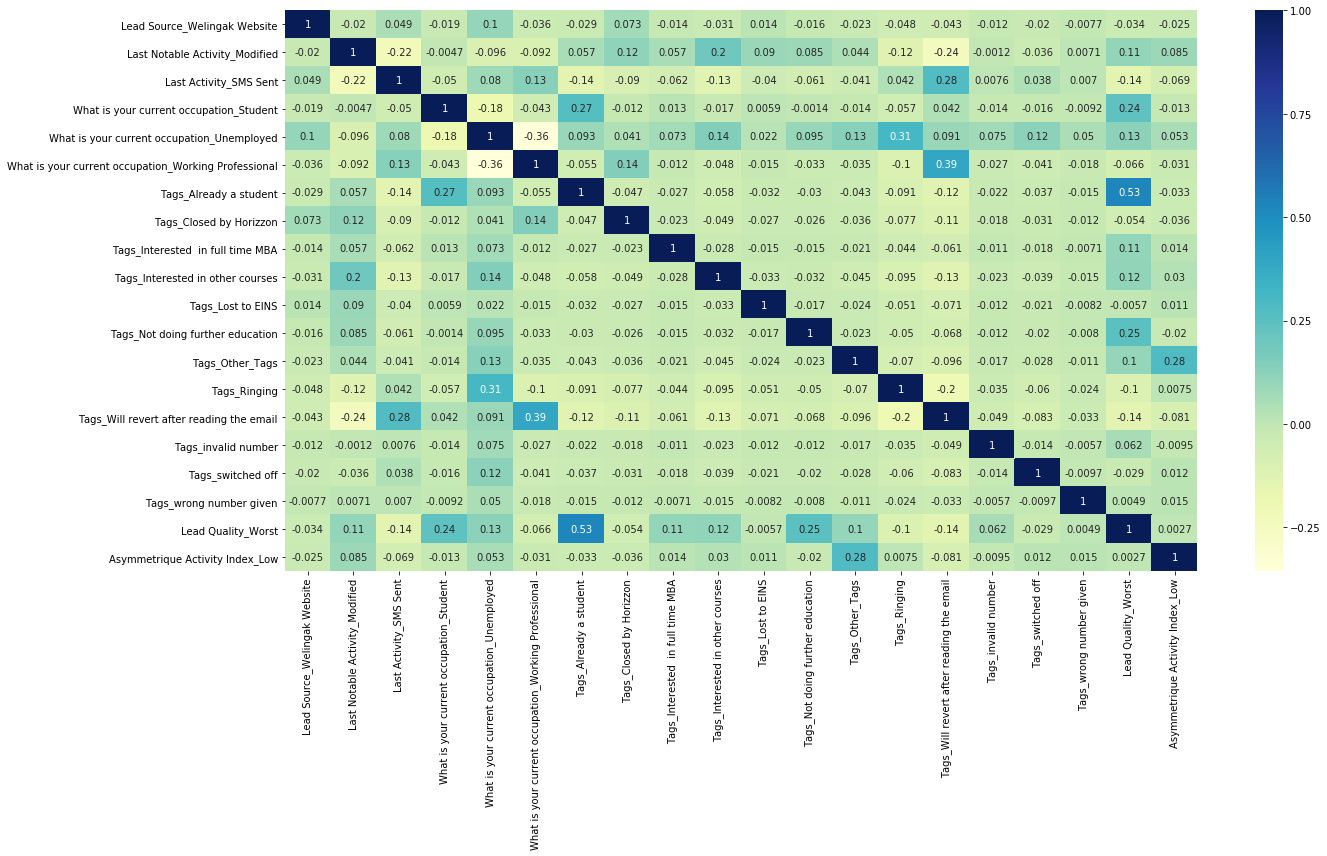

In [307]:
# Correlation Matrix / Heat map
plt.figure(figsize=(20,12))
cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.tight_layout()
plt.show()

In [308]:
#Dropping the Variables and Updating the Model
#Dropping variable with high p value as it is insignificant (Tags_wrong number given, p=0.999)

In [309]:
col = col.drop('Tags_wrong number given', 1)
col

Index(['Lead Source_Welingak Website', 'Last Notable Activity_Modified',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_Low'],
      dtype='object')

In [310]:
#Iteration 2
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6030
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1165.1
Date:                Sun, 25 Aug 2019   Deviance:                       2330.3
Time:                        20:51:40   Pearson chi2:                 1.02e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1087      0.101    -20.886      0.000      -2.307      -1.911
Lead Source_Welingak Website                             4.0712      1.028      3.961      0.000       2.057       6.086
Last Notable Activity_Modified                          -1.5189      0.130    -11.662      0.000      -1.774      -1.264
Last Activity_SMS Sent                                   2.1357      0.122     17.479      0.000       1.896       2.375
What is your current occupation_Student                  2.1870      0.526      4.161      0.000       1.157       3.217
What is your current occupation_Unemployed               2.2048      0.132     16.727      0.000       1.946       2.463
What is your current occupation_Working Professional     2.5384      0.388      6.538      0.000       1.777       3.299
Tags_Already a student                                  -3.6297      0.609     -5.960      0.000      -4.823      -2.436
Tags_Closed by Horizzon                                  5.7858      0.731      7.916      0.000       4.353       7.218
Tags_Interested  in full time MBA                       -2.8505      0.737     -3.869      0.000      -4.294      -1.406
Tags_Interested in other courses                        -2.9039      0.369     -7.868      0.000      -3.627      -2.180
Tags_Lost to EINS                                        5.6409      0.579      9.740      0.000       4.506       6.776
Tags_Not doing further education                        -3.7545      1.035     -3.627      0.000      -5.784      -1.725
Tags_Other_Tags                                         -2.0184      0.304     -6.640      0.000      -2.614      -1.423
Tags_Ringing                                            -4.8290      0.263    -18.363      0.000      -5.344      -4.314
Tags_Will revert after reading the email                 3.4095      0.217     15.725      0.000       2.985       3.834
Tags_invalid number                                     -4.6940      1.040     -4.512      0.000      -6.733      -2.655
Tags_switched off                                       -5.5891      0.730     -7.661      0.000      -7.019      -4.159
Lead Quality_Worst                                      -1.7463      0.638     -2.735      0.006      -2.998      -0.495
Asymmetrique Activity Index_Low                         -2.2103      0.418     -5.283      0.000      -3.030      -1.390
========================================================================================================================
"""

In [311]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5720    0.987420
7026    0.108251
6968    0.970847
5016    0.506737
6653    0.903066
7157    0.056906
2521    0.970847
920     0.025891
4731    0.970847
134     0.933912
dtype: float64

In [312]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98742044, 0.10825093, 0.97084691, 0.50673686, 0.90306608,
       0.05690573, 0.97084691, 0.02589066, 0.97084691, 0.93391153])

In [313]:
# Creating a dataframe with the actual conversion flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.987420,5720
1,0,0.108251,7026
2,1,0.970847,6968
3,1,0.506737,5016
4,1,0.903066,6653


In [314]:
# Creating new column 'predicted' with 1 if Conversion_Probability > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.987420,5720,1
1,0,0.108251,7026,0
2,1,0.970847,6968,1
3,1,0.506737,5016,1
4,1,0.903066,6653,1


In [315]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3507  249]
 [ 165 2129]]


In [316]:
# Predicted     not_churn    churn
# Actual
# not_churn        3507      249
# churn            165       2129

In [317]:
# Overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9315702479338843


In [318]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Closed by Horizzon,1.44
12,Tags_Other_Tags,1.43
3,What is your current occupation_Student,1.32
11,Tags_Not doing further education,1.31
16,Tags_switched off,1.23
8,Tags_Interested in full time MBA,1.17
18,Asymmetrique Activity Index_Low,1.15
10,Tags_Lost to EINS,1.12
0,Lead Source_Welingak Website,1.10
15,Tags_invalid number,1.09


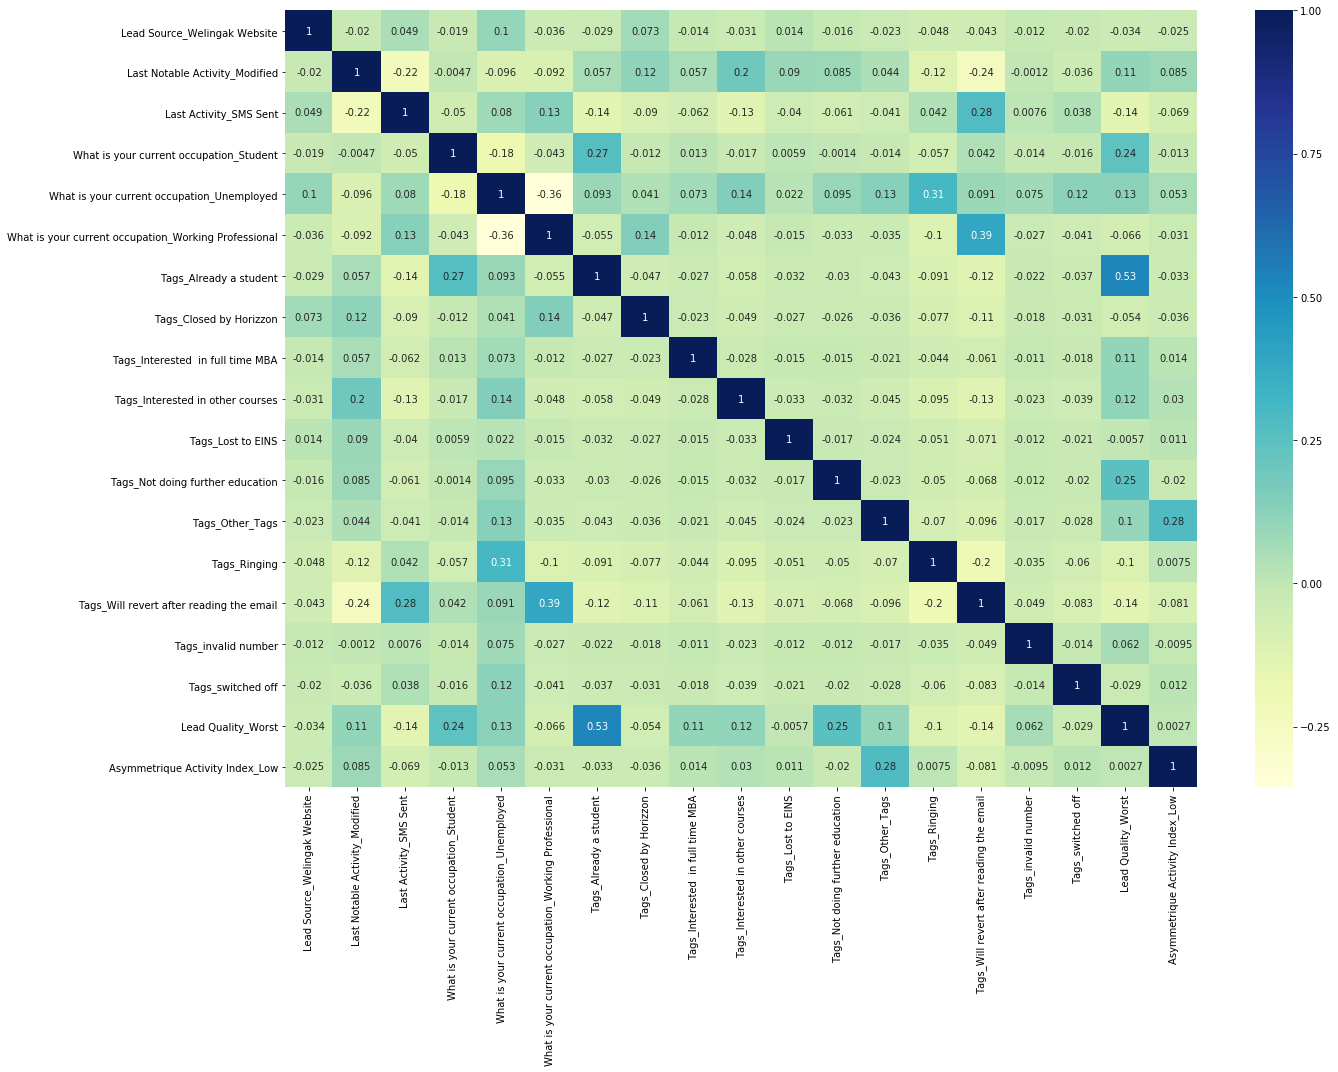

In [319]:
# Correlation Matrix / Heat map
plt.figure(figsize=(20,15))
cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.tight_layout()
plt.show()

## Insights:

1. The p- values for all variables in the final model is <0.05
2. All the features have VIF values < 3. Hence muliticollinearity hardly exist
3. The overall accuracy is 0.9315 at a probability threshold of 0.05 is also very acceptable 

## Calculating Metrics beyond Accuracy

In [320]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [321]:
# Calculating sensitivity
TP / float(TP+FN)

0.9280732345248475

In [322]:
# Calculating specificity
TN / float(TN+FP)

0.9337060702875399

In [323]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.06629392971246006


In [324]:
# positive predictive value 
print (TP / float(TP+FP))

0.8952901597981497


In [325]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9550653594771242


# ROC Curve

An ROC curve demonstrates several things:

1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [326]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [327]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

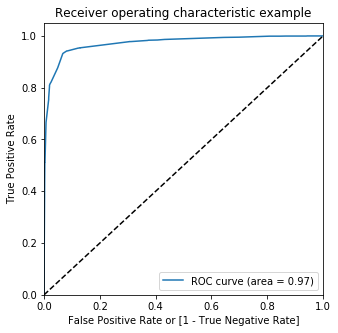

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.66240682e-04, 2.66240682e-04, 2.66240682e-04, 2.66240682e-04,
        2.66240682e-04, 2.66240682e-04, 2.66240682e-04, 2.66240682e-04,
        2.66240682e-04, 2.66240682e-04, 2.66240682e-04, 2.66240682e-04,
        5.32481363e-04, 1.33120341e-03, 1.33120341e-03, 1.59744409e-03,
        1.59744409e-03, 1.59744409e-03, 1.59744409e-03, 1.86368477e-03,
        1.86368477e-03, 1.86368477e-03, 1.86368477e-03, 1.86368477e-03,
        1.86368477e-03, 2.12992545e-03, 2.39616613e-03, 2.39616613e-03,
        2.39616613e-03, 2.39616613e-03, 2.66240682e-03, 2.66240682e-03,
        2.66240682e-03, 2.66240682e-03, 2.66240682e-03, 3.19488818e-03,
        6.92225772e-03, 6.92225772e-03, 6.92225772e-03, 6.92225772e-03,
        6.92225772e-03, 6.92225772e-03, 6.92225772e-03, 8.25346113e-03,
        1.62406816e-02, 1.65069223e-02, 1.65069223e-02, 1.650692

In [328]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## Calculating the area under the curve (AUC)

1. Larger the AUC, the better will be your model

In [329]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [330]:
auc = auc_val(fpr,tpr)
auc

0.9722701741729363

## Optimal Cut-off Point

1. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [331]:
# Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.987420,5720,1,1,1,1,1,1,1,1,1,1,1
1,0,0.108251,7026,0,1,1,0,0,0,0,0,0,0,0
2,1,0.970847,6968,1,1,1,1,1,1,1,1,1,1,1
3,1,0.506737,5016,1,1,1,1,1,1,1,0,0,0,0
4,1,0.903066,6653,1,1,1,1,1,1,1,1,1,1,1


In [332]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379174  1.000000  0.000000
0.1   0.1  0.800496  0.978204  0.691960
0.2   0.2  0.932231  0.932868  0.931842
0.3   0.3  0.932397  0.931125  0.933174
0.4   0.4  0.931901  0.929381  0.933440
0.5   0.5  0.931570  0.928073  0.933706
0.6   0.6  0.916529  0.816478  0.977636
0.7   0.7  0.915702  0.809503  0.980564
0.8   0.8  0.913719  0.804272  0.980564
0.9   0.9  0.896198  0.753269  0.983493


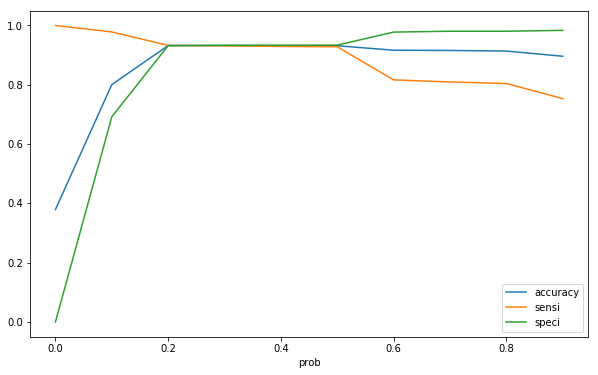

In [333]:
# Plotting accuracy sensitivity and specificity for various probabilities
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))

In [334]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.987420,5720,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.108251,7026,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.970847,6968,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.506737,5016,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.903066,6653,1,1,1,1,1,1,1,1,1,1,1,1


In [335]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.932396694214876

In [336]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[3505,  251],
       [ 158, 2136]], dtype=int64)

In [337]:
TP1 = confusion1[1,1] # true positive 
TN1 = confusion1[0,0] # true negatives
FP1 = confusion1[0,1] # false positives
FN1 = confusion1[1,0] # false negatives

In [338]:
# Sensitivity
TP1 / float(TP1+FN1)

0.9311246730601569

In [339]:
# Specificity
TN1 / float(TN1+FP1)

0.9331735889243876

In [340]:
# False postive rate - predicting churn when customer does not have churned
print(FP1/ float(TN1+FP1))

0.06682641107561235


In [341]:
# Positive predictive value 
print (TP1 / float(TP1+FP1))

0.8948470883954754


In [342]:
# Negative predictive value
print (TN1 / float(TN1+ FN1))

0.9568659568659569


## Precision and Recall
1. Precision = TP / TP + FP
2. Recall = TP / TP + FN

In [343]:
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

0.8948470883954754

In [344]:
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

0.9311246730601569

In [345]:
# Using sklearn
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8948470883954754

In [346]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9311246730601569

In [347]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

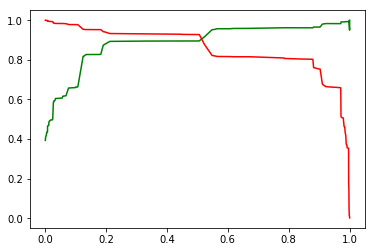

In [348]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## F1 Score
1. F1 = 2×(Precision*Recall)/(Precision+Recall)

In [349]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.91262550737022

## Making predictions on the test set

In [350]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Low,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Low,Asymmetrique Profile Index_Medium
378,0,0,-0.336465,-0.188969,-0.052301,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
321,1,0,0.497461,1.702311,1.161899,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7646,0,0,0.497461,-0.220063,-0.459058,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
6317,0,0,-1.170391,-0.876707,-1.266501,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1241,0,0,-1.170391,-0.876707,-1.266501,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [351]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Notable Activity_Modified,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_Worst,Asymmetrique Activity Index_Low
378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
321,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7646,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6317,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1241,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [352]:
X_test_sm = sm.add_constant(X_test)

In [353]:
y_test_pred = res.predict(X_test_sm)

In [354]:
y_test_pred[:10]

378     0.013138
321     0.013039
7646    0.069319
6317    0.025891
1241    0.025891
1235    0.025891
123     0.025891
6449    0.996464
6269    0.978942
8463    0.025891
dtype: float64

In [355]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [356]:
# Let's see the head
y_pred_1.head()

,0
378,0.013138
321,0.013039
7646,0.069319
6317,0.025891
1241,0.025891


In [357]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [358]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [359]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [360]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [361]:
y_pred_final.head()

,Converted,LeadID,0
0,0,378,0.013138
1,0,321,0.013039
2,0,7646,0.069319
3,0,6317,0.025891
4,0,1241,0.025891


In [362]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [363]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Conversion_Prob'], axis=1)

In [364]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,378,0,0.013138
1,321,0,0.013039
2,7646,0,0.069319
3,6317,0,0.025891
4,1241,0,0.025891


In [365]:
y_pred_final.shape

(2593, 3)

In [366]:
# Using the probability threshold value 0f 0.3 on the test dataset to predict if a lead will convert

In [367]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [368]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,378,0,0.013138,0
1,321,0,0.013039,0
2,7646,0,0.069319,0
3,6317,0,0.025891,0
4,1241,0,0.025891,0


In [369]:
# Overall Accuracy
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.9217123023524875

In [370]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1446  138]
 [  65  944]]


In [371]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [372]:
# Calculating the different metrics beyond accuracy on the test dataset

In [373]:
# Sensitivity
TP / float(TP+FN)

0.9355797819623389

In [374]:
#Specificity
TN / float(TN+FP)

0.9128787878787878

In [375]:
# False Postive rate
print(FP/ float(TN+FP))

0.08712121212121213


In [376]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8724584103512015


In [377]:
# Negative predictive value
print (TN / float(TN+ FN))

0.956982131039047


In [378]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.8724584103512015

In [379]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.9355797819623389

In [380]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.9029172644667623

In [381]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1584
           1       0.87      0.94      0.90      1009

   micro avg       0.92      0.92      0.92      2593
   macro avg       0.91      0.92      0.92      2593
weighted avg       0.92      0.92      0.92      2593



In [382]:
# Cross Validation Score
# To avoid overfitting, let us calculate the Cross Validation Score to see how our model performs

from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.85532407 0.8982659  0.90509259 0.90509259 0.92013889 0.9212963
 0.92476852 0.92947977 0.93757225 0.94212963]
0.9139160511667737


In [383]:
# ROC curve of test data

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [384]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

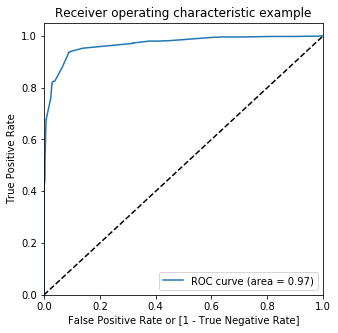

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.31313131e-04, 6.31313131e-04, 6.31313131e-04, 6.31313131e-04,
        6.31313131e-04, 6.31313131e-04, 3.15656566e-03, 3.15656566e-03,
        3.15656566e-03, 3.15656566e-03, 3.15656566e-03, 3.15656566e-03,
        6.94444444e-03, 6.94444444e-03, 6.94444444e-03, 6.94444444e-03,
        7.57575758e-03, 7.57575758e-03, 7.57575758e-03, 1.07323232e-02,
        2.46212121e-02, 2.46212121e-02, 2.46212121e-02, 2.77777778e-02,
        2.84090909e-02, 2.84090909e-02, 2.90404040e-02, 2.904040

In [385]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

In [386]:
# AUC
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [387]:
auc = auc_val(fpr,tpr)
auc

0.9677939579141265

# Lead Scoring

1. Lead score can be calculated on a point range of 0 to 100
2. Lead score  = 100* conversion probability

Lead Score Reference:
https://en.wikipedia.org/wiki/Lead_scoring
https://blog.hubspot.com/marketing/lead-scoring-instructions#targetText=Lead%20scoring%20models%20ensure%20the,attribute%20of%20your%20core%20customer.

In [388]:
# Test data set with predicted and probability values
leads_test_pred = y_pred_final.copy()
leads_test_pred.head(3)

,LeadID,Converted,Conversion_Prob,final_predicted
0,378,0,0.013138,0
1,321,0,0.013039,0
2,7646,0,0.069319,0


In [389]:
# Train data set with predicted and probability values
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head(3)

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.987420,5720,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.108251,7026,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.970847,6968,1,1,1,1,1,1,1,1,1,1,1,1


In [390]:
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
# combining both the data frames
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,5720,1,0.987420,1
1,7026,0,0.108251,0
2,6968,1,0.970847,1
3,5016,1,0.506737,1
4,6653,1,0.903066,1


In [391]:
# Lead score (0 - 100). In simple terms using the probability values as absolute number
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,5720,1,0.987420,1,99
1,7026,0,0.108251,0,11
2,6968,1,0.970847,1,97
3,5016,1,0.506737,1,51
4,6653,1,0.903066,1,90


In [392]:
# Setting index as lead id so that it can be merged with actual data
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
0,0,0.013039,0,1
1,0,0.008724,0,1
2,1,0.970340,1,97
3,0,0.001923,0,0
4,1,0.879394,1,88


In [393]:
leads_data = leads_data[['Lead Number']]
# Combining both the data frames so that lead score can be used
leads_with_score = pd.concat([leads_data, lead_full_pred], axis=1)
leads_with_score.head()

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,,
0,660737,0,0.013039,0,1
1,660728,0,0.008724,0,1
2,660727,1,0.970340,1,97
3,660719,0,0.001923,0,0
4,660681,1,0.879394,1,88


In [394]:
leads_with_score.to_csv("Leadscore.csv")

## Conclusion:
1. AUC score of 0.967 indicate that the model performance is good on test dataset
2. Overall accuracy is 0.9217 at a probability threshold of 0.3
3. Below features have a positive effect on conversion rate
 - Lead Source_Welingak Website
 - Last Activity_SMS Sent
 - What is your current occupation_Student
 - What is your current occupation_Unemployed
 - What is your current occupation_Working Professional
 - Tags_Closed by Horizzon
 - Tags_Lost to EINS
 - Tags_Will revert after reading the email
4. Below features have a negative effect on conversion rate
 - Last Notable Activity_Modified
 - Tags_Already a student
 - Tags_Interested in full time MBA
 - Tags_Interested in other courses
 - Tags_Not doing further education
 - Tags_Other_Tags
 - Tags_Ringing
 - Tags_invalid number
 - Tags_switched off
 - Lead Quality_Worst
 - Asymmetrique Activity Index_Low
